In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium

In [2]:
Spotify_df = pd.read_csv('SpotifyTopSongsByCountry - May 2020.csv')

In [3]:
Spotify_df

,Country,Continent,Rank,Title,Artists,Album,Explicit,Duration
0,Global,Global,1,Rain On Me (with Ariana Grande),"Lady Gaga, Ariana Grande",Rain On Me (with Ariana Grande),0,3:02
1,Global,Global,2,Blinding Lights,The Weeknd,After Hours,0,3:20
2,Global,Global,3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",BLAME IT ON BABY,1,3:01
3,Global,Global,4,Roses - Imanbek Remix,"SAINt JHN, Imanbek",Roses (Imanbek Remix),1,2:56
4,Global,Global,5,Toosie Slide,Drake,Dark Lane Demo Tapes,1,4:07
...,...,...,...,...,...,...,...,...
3145,Vietnam,Asia,46,ĐÃ TỪNG LÀ,Vũ.,ĐÃ TỪNG LÀ,0,4:20
3146,Vietnam,Asia,47,Mượn Rượu Tỏ Tình,"BigDaddy, Emily",Mượn Rượu Tỏ Tình,0,3:18
3147,Vietnam,Asia,48,Ngày Tận Thế,"Tóc Tiên, Da LAB, Touliver",Ngày Tận Thế,0,3:52
3148,Vietnam,Asia,49,Đi Đu Đưa Đi,Bich Phuong,Đi Đu Đưa Đi,0,3:40


In [5]:
Spotify_df.shape

(3150, 8)

In [8]:
Spotify_df.head(10)

,Country,Continent,Rank,Title,Artists,Album,Explicit,Duration
0,Global,Global,1,Rain On Me (with Ariana Grande),"Lady Gaga, Ariana Grande",Rain On Me (with Ariana Grande),0,3:02
1,Global,Global,2,Blinding Lights,The Weeknd,After Hours,0,3:20
2,Global,Global,3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",BLAME IT ON BABY,1,3:01
3,Global,Global,4,Roses - Imanbek Remix,"SAINt JHN, Imanbek",Roses (Imanbek Remix),1,2:56
4,Global,Global,5,Toosie Slide,Drake,Dark Lane Demo Tapes,1,4:07
5,Global,Global,6,death bed (coffee for your head) (feat. beabad...,"Powfu, beabadoobee",death bed (coffee for your head) (feat. beabad...,0,2:53
6,Global,Global,7,THE SCOTTS,"THE SCOTTS, Travis Scott, Kid Cudi",THE SCOTTS,1,2:45
7,Global,Global,8,Don't Start Now,Dua Lipa,Future Nostalgia,0,3:03
8,Global,Global,9,Stuck with U (with Justin Bieber),"Ariana Grande, Justin Bieber",Stuck with U,0,3:48
9,Global,Global,10,Dance Monkey,Tones And I,Dance Monkey (Stripped Back) / Dance Monkey,0,3:29


In [9]:
unique_countries = Spotify_df["Country"].unique()
unique_countries = unique_countries[unique_countries != "Global"]
unique_countries

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Singapore', 'Slovakia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'United Kingdom',
       'United States', 'Uruguay', 'Vietnam'], dtype=object)

In [13]:
latitude = []
longitude = []
geolocator = Nominatim(user_agent="my-app")

for i in unique_countries:
    location = geolocator.geocode(i)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

In [17]:
data = pd.DataFrame({
   'lat':latitude,
   'lon':longitude,
   'name':unique_countries,
    'value':[20.0]*62
})

data

,lat,lon,name,value
0,-34.996496,-64.967282,Argentina,20.0
1,-24.776109,134.755000,Australia,20.0
2,47.200000,13.200000,Austria,20.0
3,50.640281,4.666715,Belgium,20.0
4,-17.056870,-64.991229,Bolivia,20.0
...,...,...,...,...
57,38.959759,34.924965,Turkey,20.0
58,54.702354,-3.276575,United Kingdom,20.0
59,39.783730,-100.445882,United States,20.0
60,-32.875555,-56.020153,Uruguay,20.0


In [20]:
map = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
map

In [21]:
for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='#1db954',
      fill=True,
      fill_color='#1db954'
   ).add_to(map)

In [22]:
map

In [23]:
Spotify_df["Continent"].unique()

array(['Global', 'South America', 'Australia', 'Europe', 'North America',
       'Asia', 'Africa'], dtype=object)

In [24]:
continent_value_counts = (Spotify_df["Continent"].value_counts()/50).astype("int32")
continent_value_counts = continent_value_counts.drop("Global")

In [25]:
continent_value_counts

Europe           29
Asia             11
North America    10
South America     9
Australia         2
Africa            1
Name: Continent, dtype: int32

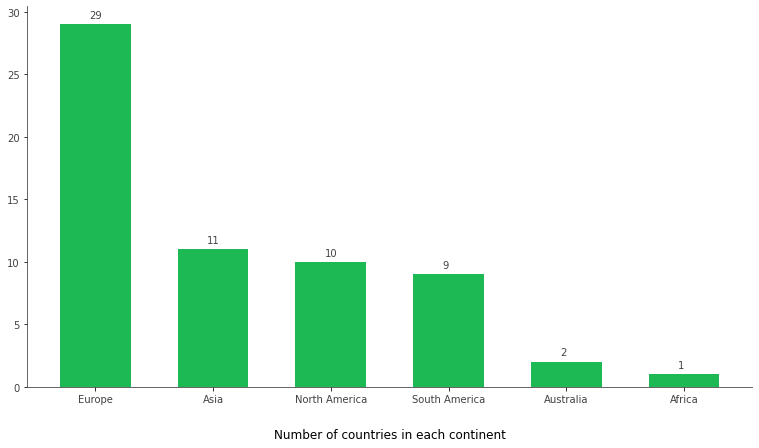

In [26]:
height = continent_value_counts.values
bars = continent_value_counts.index
y_pos = range(0,12,2)

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=1.2)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
for i, v in enumerate(height):
    ax.text((i)*2 - 0.1, v+0.5, str(v), color='#424242')
plt.title("Number of countries in each continent", y=-0.15)

plt.show()

In [27]:
top10_tracks = Spotify_df["Title"].value_counts()[:10].sort_values(ascending=True)

In [28]:
top10_tracks

Break My Heart                                          35
THE SCOTTS                                              36
Stuck with U (with Justin Bieber)                       39
Toosie Slide                                            43
Roses - Imanbek Remix                                   45
Don't Start Now                                         52
Dance Monkey                                            53
death bed (coffee for your head) (feat. beabadoobee)    53
Rain On Me (with Ariana Grande)                         60
Blinding Lights                                         60
Name: Title, dtype: int64

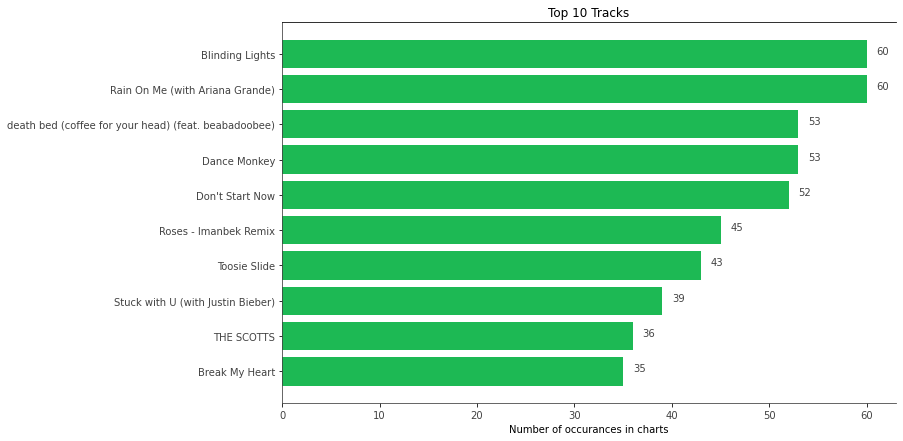

In [29]:
height = top10_tracks.values
bars = top10_tracks.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Tracks")


plt.show()

In [32]:
Artists = []
for i in Spotify_df["Artists"]:
    a = i.split(", ")
    Artists = Artists + a


len(Artists)

5056

In [34]:
top10_artists = pd.Series(Artists).value_counts()[:10].sort_values(ascending=True)
top10_artists

Roddy Ricch        72
Justin Bieber      74
Rauw Alejandro     82
The Weeknd         87
Sech               92
Dua Lipa           97
Travis Scott      101
Ariana Grande     102
J Balvin          105
Bad Bunny         232
dtype: int64

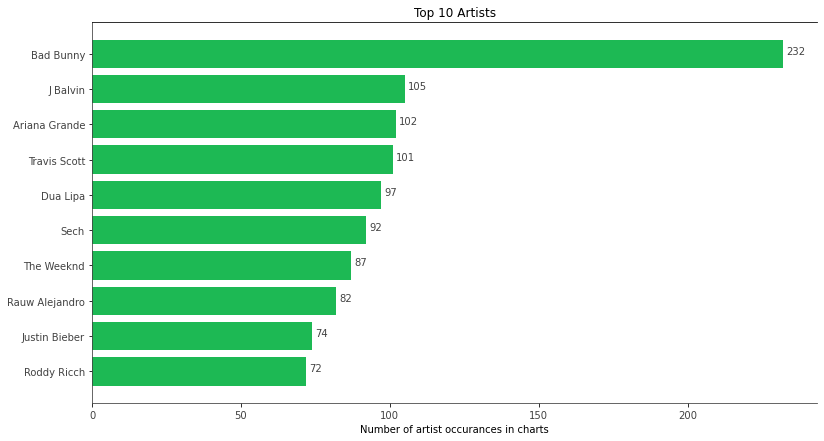

In [35]:
height = top10_artists.values
bars = top10_artists.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of artist occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Artists")


plt.show()

In [37]:
top10_albums = Spotify_df["Album"].value_counts()[:10].sort_values(ascending=True)

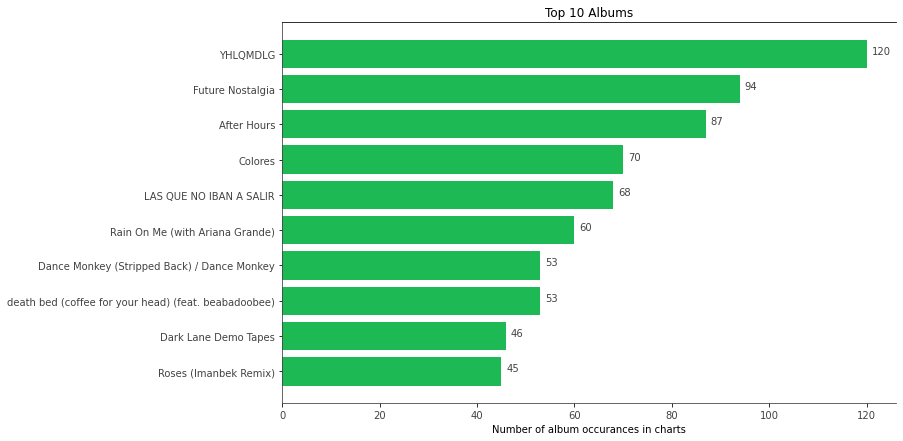

In [38]:
height = top10_albums.values
bars = top10_albums.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of album occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Albums")

plt.show()

In [39]:
seconds = []
for i in Spotify_df["Duration"]:
    val = i.split(":")
    secs = int(val[0])*60 + int(val[1])
    seconds.append(secs)

C:\Users\Rajat\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


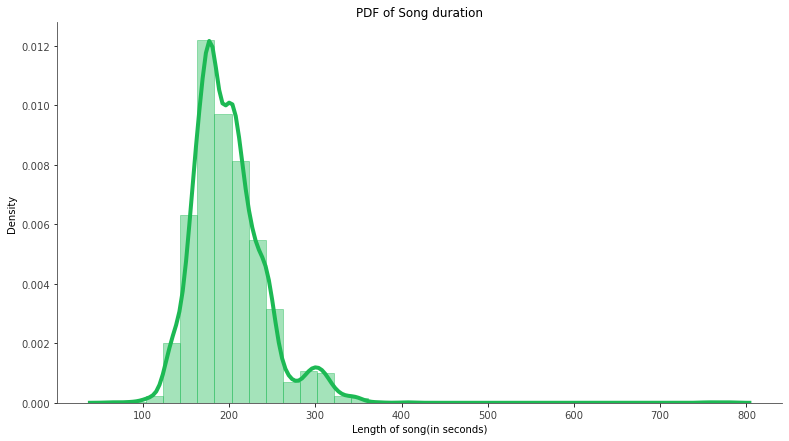

In [40]:
fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.distplot(seconds, hist=True, kde=True, bins=int(180/5), color = '#1db954',  hist_kws={'edgecolor':'#1db954'},
             kde_kws={'linewidth': 4})
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of song(in seconds)")
plt.title("PDF of Song duration")

plt.show()

In [41]:
Spotify_df["duration_in_s"] = seconds
duration_by_c = Spotify_df.groupby("Country").mean()["duration_in_s"]

In [42]:
duration_by_c

Country
Argentina         201.88
Australia         189.94
Austria           182.10
Belgium           193.72
Bolivia           205.96
                   ...  
Turkey            194.36
United Kingdom    191.08
United States     193.56
Uruguay           206.40
Vietnam           209.12
Name: duration_in_s, Length: 63, dtype: float64

In [43]:
bottom5_duration = duration_by_c.sort_values()[:5]
bottom5_duration

Country
Germany    176.56
Sweden     179.50
Brazil     181.80
Austria    182.10
Denmark    184.22
Name: duration_in_s, dtype: float64

In [44]:
top5_duration = duration_by_c.sort_values(ascending=False)[:5]
top5_duration

Country
Japan        264.10
Indonesia    236.54
Thailand     223.00
Taiwan       220.66
India        217.16
Name: duration_in_s, dtype: float64

In [45]:
filtered_data = Spotify_df[(Spotify_df["Country"].isin(list(top5_duration.index))) + (Spotify_df["Country"].isin(list(bottom5_duration.index)))]
filtered_data

C:\Users\Rajat\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


,Country,Continent,Rank,Title,Artists,Album,Explicit,Duration,duration_in_s
150,Austria,Europe,1,Roadrunner,Bonez MC,Roadrunner,0,2:29,149
151,Austria,Europe,2,Komm Komm,Capital Bra,Komm Komm,0,2:40,160
152,Austria,Europe,3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",BLAME IT ON BABY,1,3:01,181
153,Austria,Europe,4,Roses - Imanbek Remix,"SAINt JHN, Imanbek",Roses (Imanbek Remix),1,2:56,176
154,Austria,Europe,5,GOOBA,6ix9ine,GOOBA,1,2:12,132
...,...,...,...,...,...,...,...,...,...
2895,Thailand,Asia,46,คำตอบ,Safeplanet,Safeboys,0,5:19,319
2896,Thailand,Asia,47,พอเถอะ,MEAN,พอเถอะ,0,4:02,242
2897,Thailand,Asia,48,Supalonely,"BENEE, Gus Dapperton",STELLA & STEVE,1,3:43,223
2898,Thailand,Asia,49,Say So,Doja Cat,Hot Pink,1,3:57,237


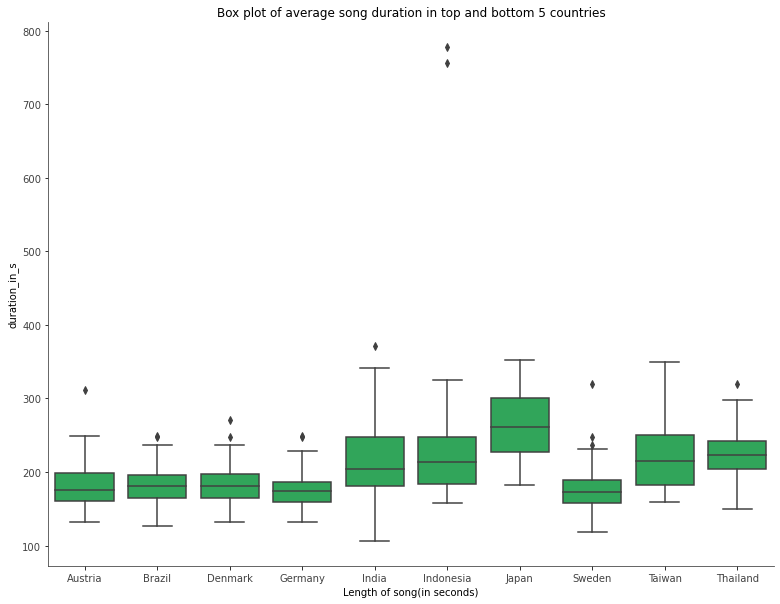

In [47]:
fig = plt.figure(figsize=[13,10], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.boxplot( x = filtered_data["Country"], y = filtered_data["duration_in_s"], color = '#1db954')
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of song(in seconds)")
plt.title("Box plot of average song duration in top and bottom 5 countries")

plt.show()

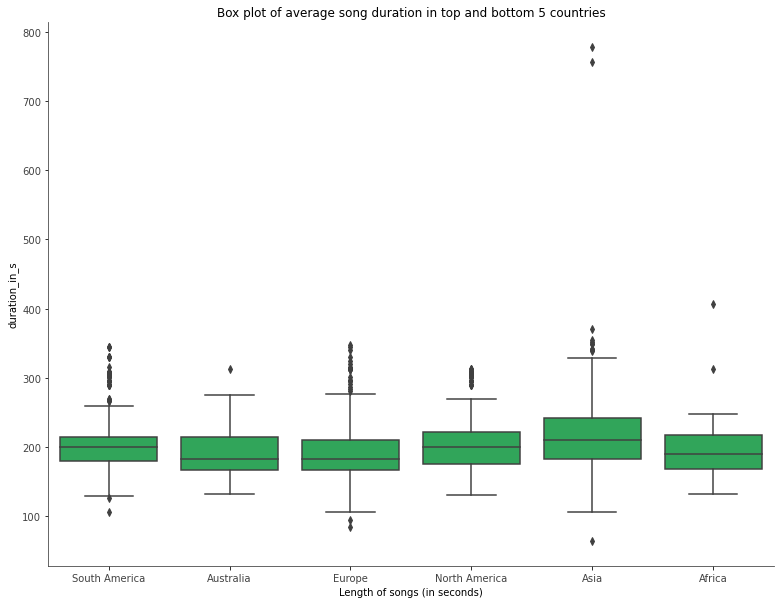

In [48]:
filtered_data2 = Spotify_df[Spotify_df["Continent"] != "Global"]
fig = plt.figure(figsize=[13,10], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.boxplot( x = filtered_data2["Continent"], y = filtered_data2["duration_in_s"], color = '#1db954')
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of songs (in seconds)")
plt.title("Box plot of average song duration in top and bottom 5 countries")

plt.show()

In [49]:
exp_data = Spotify_df["Explicit"].value_counts().sort_values()
exp_data

1    1099
0    2051
Name: Explicit, dtype: int64

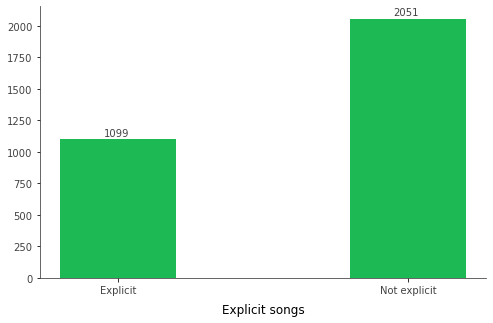

In [50]:
height = exp_data.values
bars = ["Explicit", "Not explicit"]
y_pos = range(0,4,2)

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=0.8)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
for i, v in enumerate(height):
    ax.text((i)*2 - 0.1, v+30, str(v), color='#424242')
plt.title("Explicit songs", y=-0.15)

plt.show()

In [53]:
# Around 35% of the songs liked by people are Explicit. Let's see how it varies by location.
exp_data_cont = Spotify_df.groupby("Continent").mean()["Explicit"]
exp_data_cont

Continent
Africa           0.460000
Asia             0.185455
Australia        0.440000
Europe           0.404138
Global           0.460000
North America    0.394000
South America    0.275556
Name: Explicit, dtype: float64

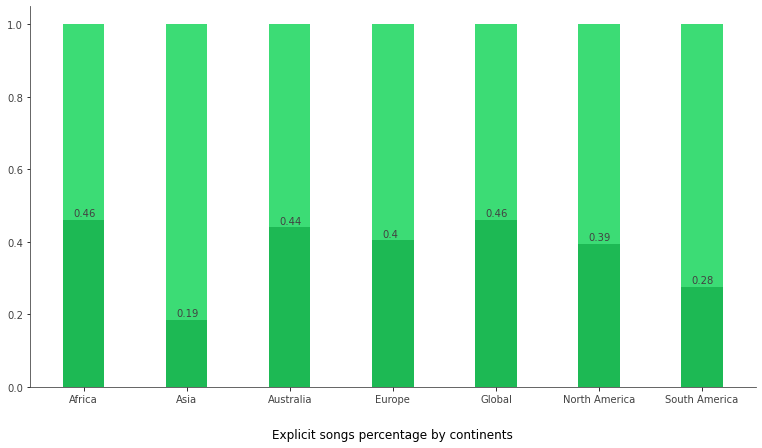

In [54]:
height = exp_data_cont.values
bars = exp_data_cont.index
y_pos = range(0,14,2)

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=0.8)
plt.bar(y_pos, 1 - height, bottom = height,color="#3CDC75", width=0.8)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")

for i, v in enumerate(height):
    ax.text((i)*2 - 0.2, v+0.01, str(np.round(v,2)), color='#424242')

plt.title("Explicit songs percentage by continents", y=-0.15)

plt.show()

Turns out Asian countries don't prefer Explicit songs (18% approx.) as compared to other countries. Also, "Global Top 50 Chart" has 23 explicit songs.

Dataset is imbalanced with more Europian countries.
Few songs have managed to make in 96% of Top Charts of all countries.
Even though few artists have many occurances in the Top charts, they don't have any song in Top 10 tracks occurances.
Average song duration preferred by most is around 3:00 minutes to 3:20 minutes
People in Asian countries prefer longer song duration. Europian countries mostly listen to songs close to or less than 3 minutes.
Asian countries prefer less of explicit songs, only 18%, compared to world average of 35%. "Global Top 50 Chart" has 23 explicit songs.